In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
df = pd.read_csv(r'credit_risk_prediction/german_credit_data.csv')

In [3]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
df.shape

(1000, 11)

In [5]:
df.tail()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad
999,999,27,male,2,own,moderate,moderate,4576,45,car,good


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


### There are Rows:1000 and Columns:10.
### droping 2 columns that are Checking account and unnamed.

In [7]:
df = df.drop('Checking account',axis = 1)

In [8]:
df = df.drop('Unnamed: 0',axis = 1)

In [9]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,1169,6,radio/TV,good
1,22,female,2,own,little,5951,48,radio/TV,bad
2,49,male,1,own,little,2096,12,education,good
3,45,male,2,free,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,4870,24,car,bad


### Lable encoding columns such as Sex, Housing, Saving accounts, Purpose and Risk

In [10]:
df['Saving accounts'].unique()

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [11]:
l = {
    'little' : 1, 
    'quite rich' : 2,
    'rich' : 3, 
    'moderate' : 4
}

In [12]:
df['Saving accounts'] = df['Saving accounts'].replace(l)

In [13]:
s = {'male':1,
     'female':2
    }
df['Sex'] = df['Sex'].replace(s)

In [14]:
df['Housing'].unique()

array(['own', 'free', 'rent'], dtype=object)

In [15]:
h = {'own':0, 
     'free':1, 
     'rent':2
    }

df['Housing'] = df['Housing'].replace(h)

In [16]:
df['Purpose'].unique()

array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object)

In [17]:
p = {'radio/TV' : 0, 
     'education' : 1, 
     'furniture/equipment' : 2, 
     'car' : 3, 'business' : 4,
     'domestic appliances' : 5, 
     'repairs' : 6, 
     'vacation/others' : 7
    }

df['Purpose'] = df['Purpose'].replace(p)

In [18]:
df['Risk'].unique()

array(['good', 'bad'], dtype=object)

In [19]:
r = {
    'good' : 0, 
    'bad' : 1
}

df['Risk'] = df['Risk'].replace(r)

In [20]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose,Risk
0,67,1,2,0,NaN,1169,6,0,0
1,22,2,2,0,1.0,5951,48,0,1
2,49,1,1,0,1.0,2096,12,1,0
3,45,1,2,1,1.0,7882,42,2,0
4,53,1,2,1,1.0,4870,24,3,1


In [21]:
df.isnull().sum()

Age                  0
Sex                  0
Job                  0
Housing              0
Saving accounts    183
Credit amount        0
Duration             0
Purpose              0
Risk                 0
dtype: int64

In [22]:
null_values = df.isnull()
# percentage of null values 
round(null_values.mean() * 100, 2)

Age                 0.0
Sex                 0.0
Job                 0.0
Housing             0.0
Saving accounts    18.3
Credit amount       0.0
Duration            0.0
Purpose             0.0
Risk                0.0
dtype: float64

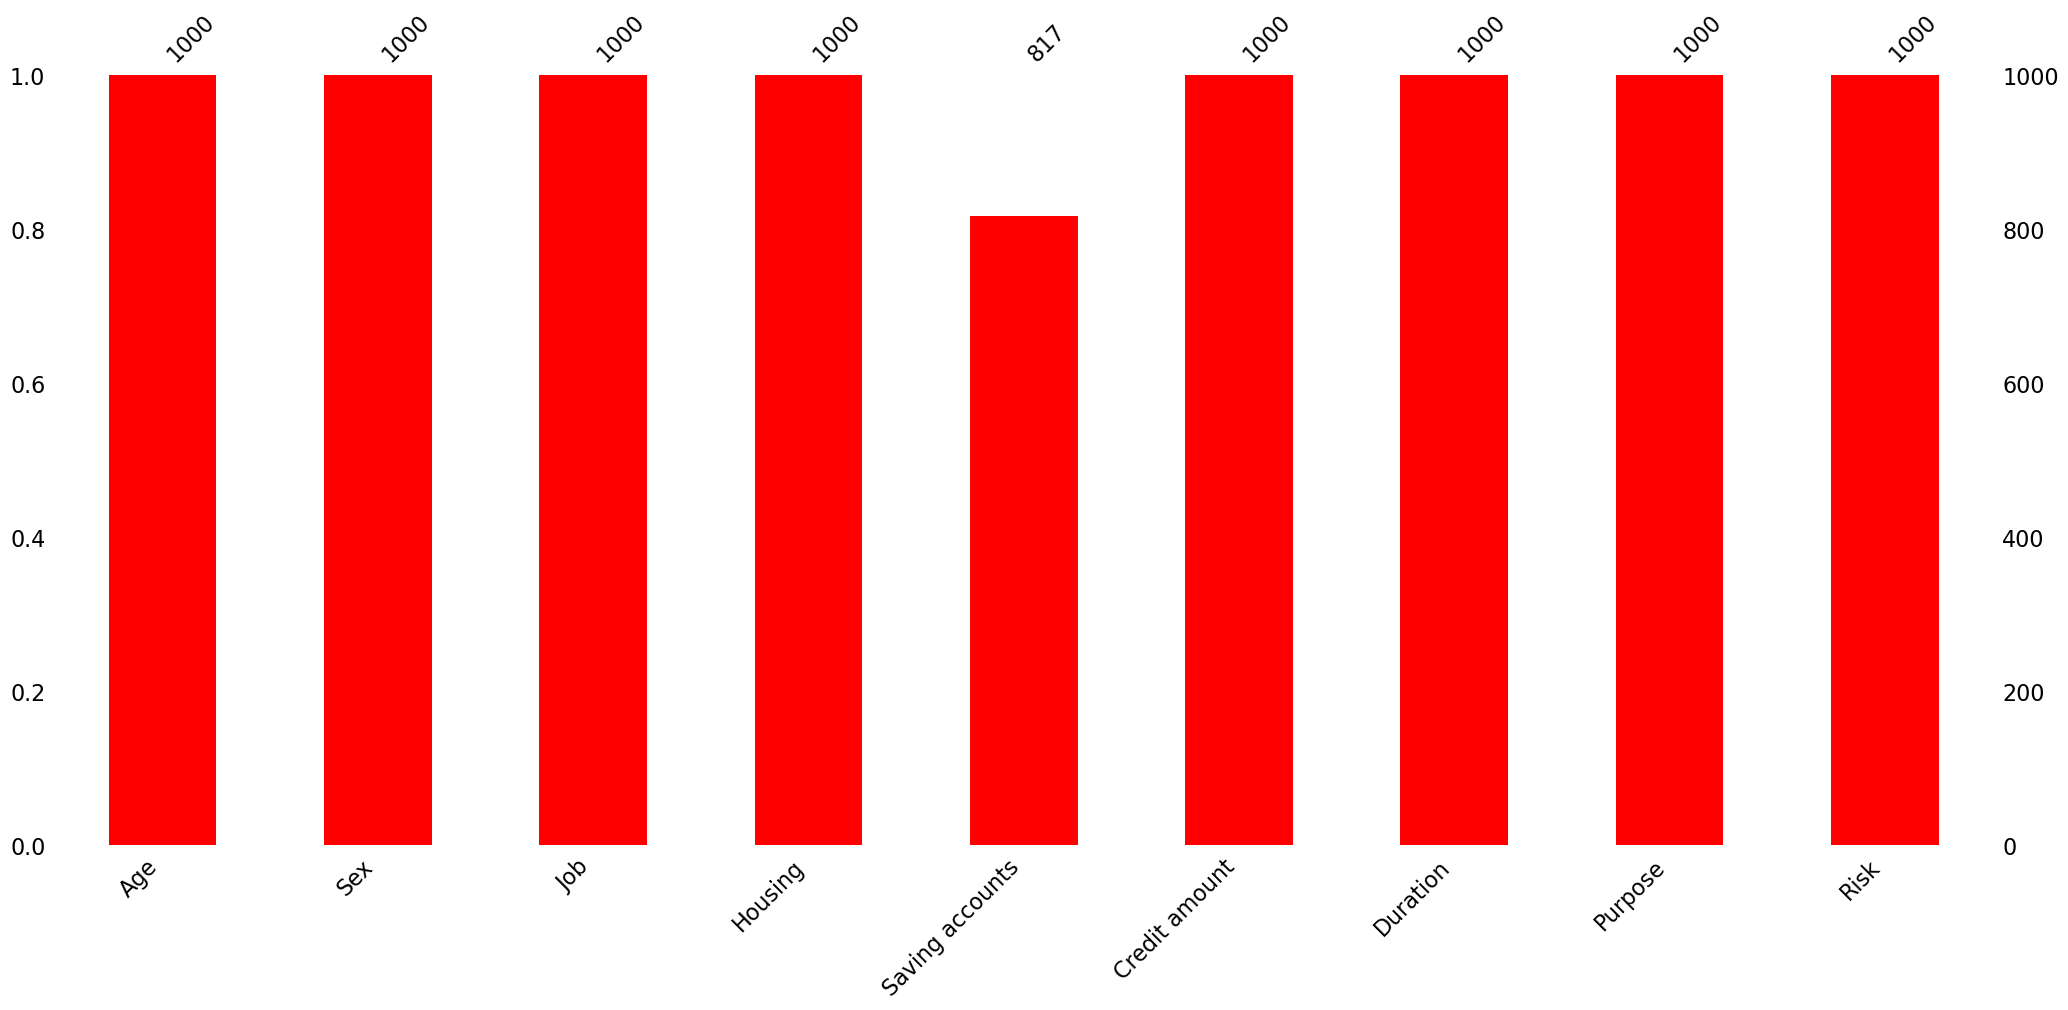

In [23]:
msno.bar(df,color='red')
plt.show()

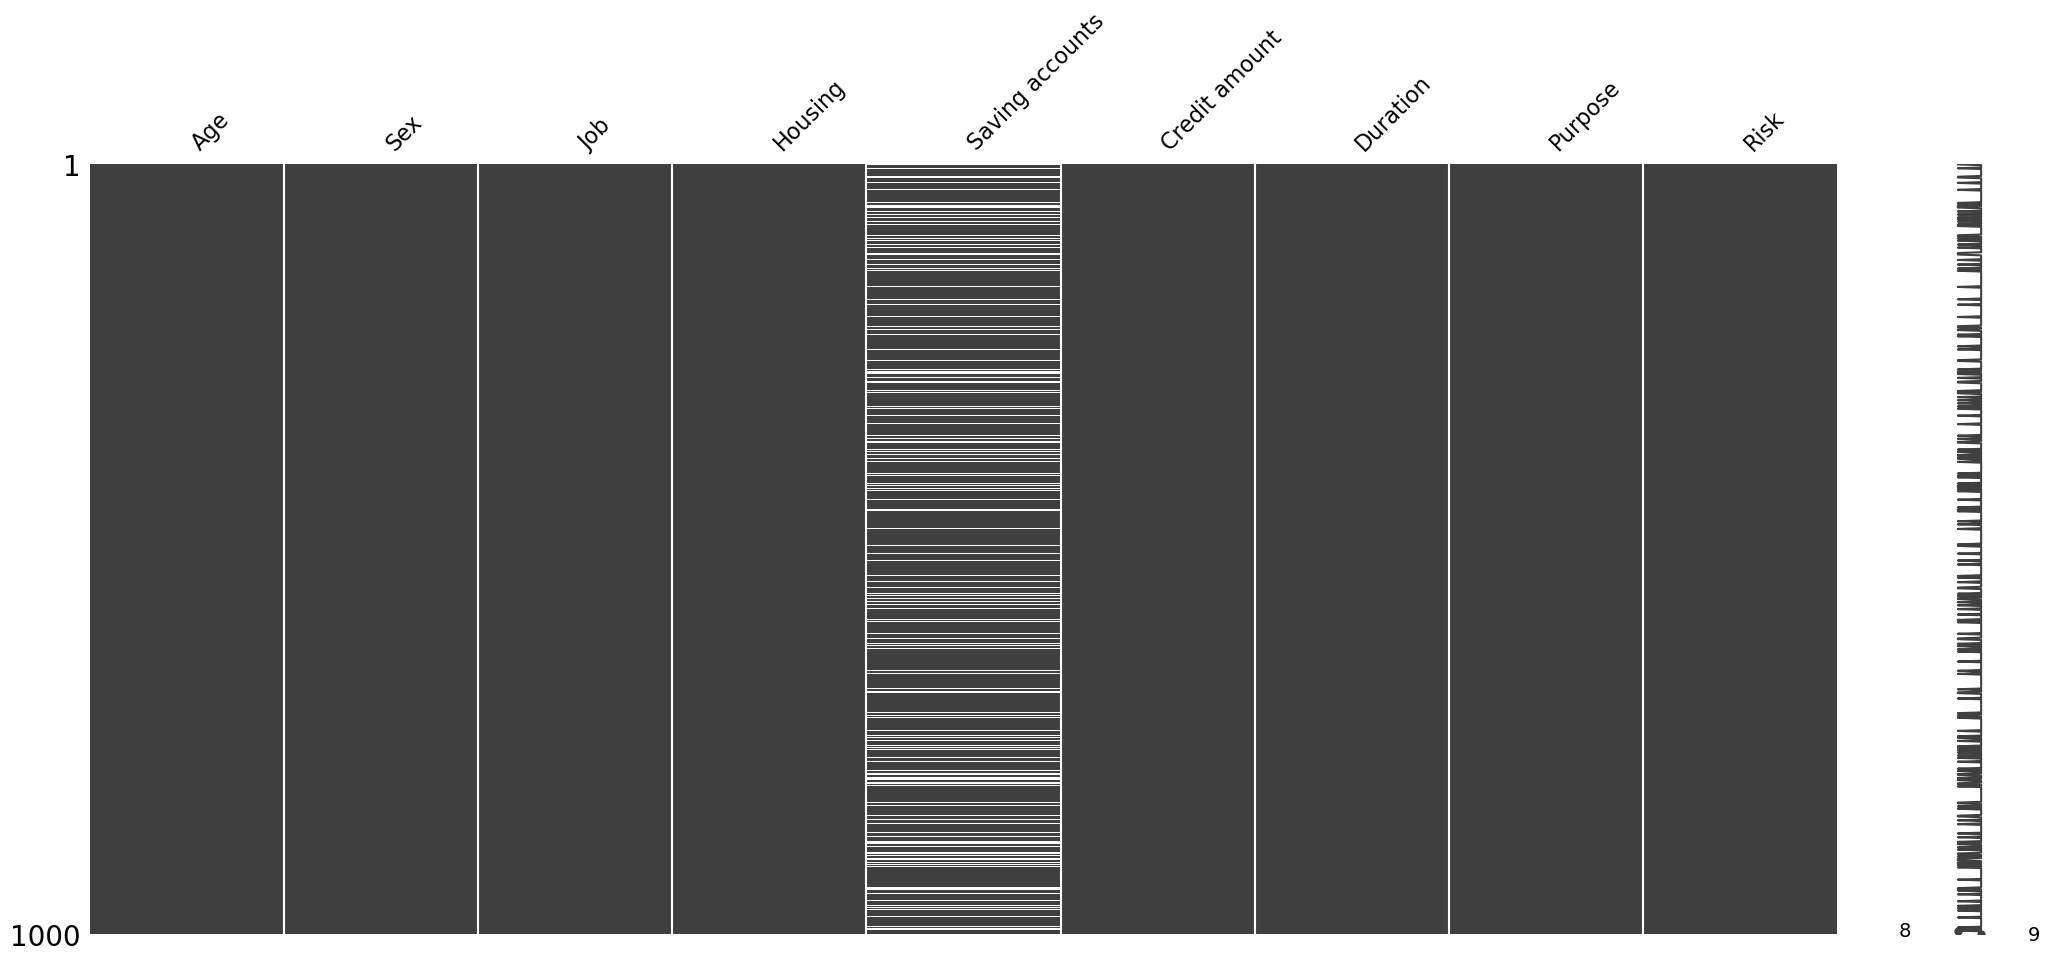

In [24]:
msno.matrix(df)
plt.show()

### We can see that there are 183 or 18.3% null values in Savings account columns. So Replacing null values with median

In [25]:
# Calculate the median of the column
median = df['Saving accounts'].median()

# Replace null values with the median
df['Saving accounts'].fillna(median, inplace=True)

In [26]:
df.isnull().sum()

Age                0
Sex                0
Job                0
Housing            0
Saving accounts    0
Credit amount      0
Duration           0
Purpose            0
Risk               0
dtype: int64

In [27]:
df.describe()

,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose,Risk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.310000,1.904000,0.466000,1.468000,3271.258000,20.903000,2.096000,0.300000
std,11.375469,0.462725,0.653614,0.779392,0.981804,2822.736876,12.058814,1.630166,0.458487
min,19.000000,1.000000,0.000000,0.000000,1.000000,250.000000,4.000000,0.000000,0.000000
25%,27.000000,1.000000,2.000000,0.000000,1.000000,1365.500000,12.000000,0.000000,0.000000
50%,33.000000,1.000000,2.000000,0.000000,1.000000,2319.500000,18.000000,2.000000,0.000000
75%,42.000000,2.000000,2.000000,1.000000,1.000000,3972.250000,24.000000,3.000000,1.000000
max,75.000000,2.000000,3.000000,2.000000,4.000000,18424.000000,72.000000,7.000000,1.000000


### The below code calculates the upper and lower whiskers based on the IQR and identifies data points that fall outside these whiskers as outliers.

In [28]:
def outliers_chart(df,*var):
    for i in var:
        plt.figure(figsize=(10,6))
        plt.title(f'Outliers in {i}', fontsize=15)
        sns.boxplot(data= df, x=i)
        plt.show()
        print()
        q1,q3 = np.percentile(df[i],(25,75))
        IQR = q3 -q1
        up_ws = q3 + 1.5 * IQR
        lw_ws = q1 - 1.5 * IQR
        out_data = df[(df[i]<lw_ws) | (df[i]>up_ws)]
        print(f'Outliers in {i}: ', round(out_data.shape[0]/df.shape[0]*100,2),'%')
        print()

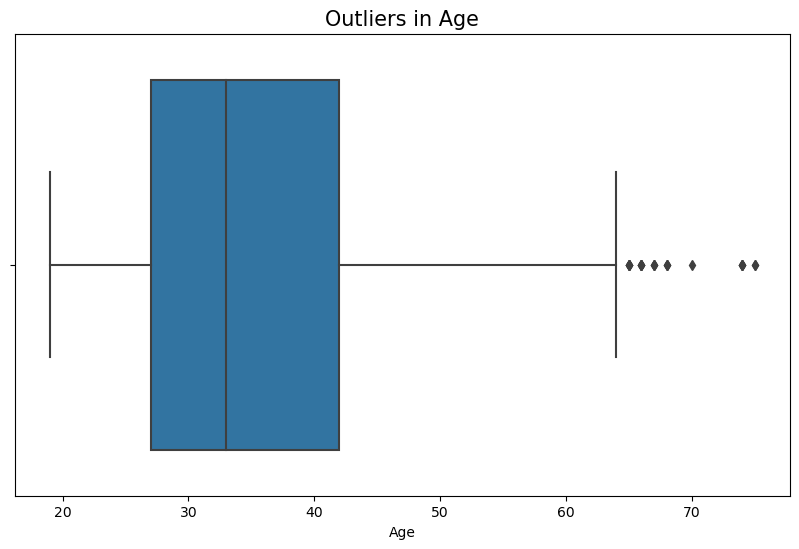


Outliers in Age:  2.3 %



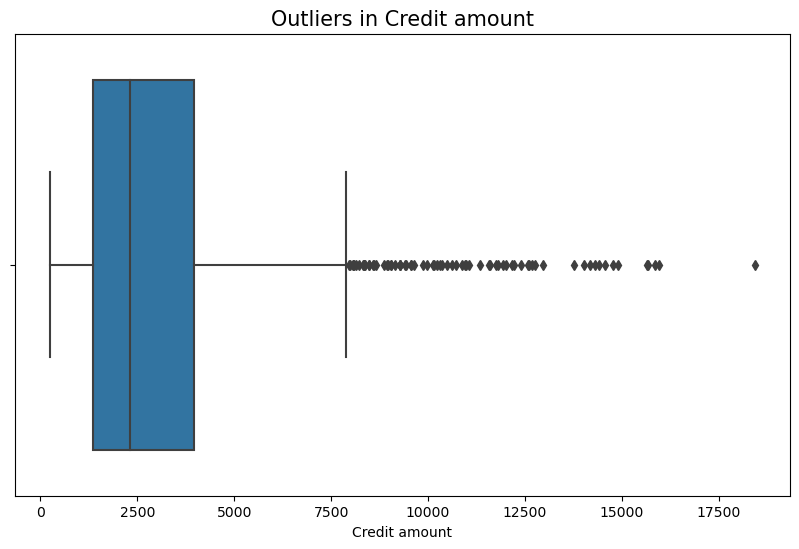


Outliers in Credit amount:  7.2 %



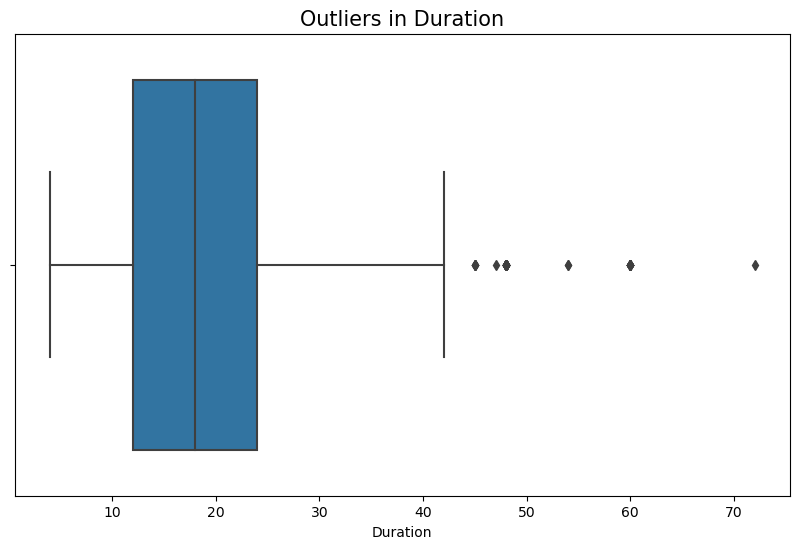


Outliers in Duration:  7.0 %



In [29]:
outliers_chart(df,'Age','Credit amount', 'Duration')

In [30]:
def replace_outliers_with_mean(df, *var):
    for i in var:
        q1, q3 = np.percentile(df[i], (25, 75))
        IQR = q3 - q1
        up_ws = q3 + 1.5 * IQR
        lw_ws = q1 - 1.5 * IQR
        
        # Replace outliers with mean value
        df.loc[df[i] > up_ws, i] = df[i].mean()
        df.loc[df[i] < lw_ws, i] = df[i].mean()
        
    return df
replace_outliers_with_mean(df,'Age','Credit amount', 'Duration')

,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose,Risk
0,35.546,1,2,0,1.0,1169.0,6.000,0,0
1,22.000,2,2,0,1.0,5951.0,20.903,0,1
2,49.000,1,1,0,1.0,2096.0,12.000,1,0
3,45.000,1,2,1,1.0,7882.0,42.000,2,0
4,53.000,1,2,1,1.0,4870.0,24.000,3,1
...,...,...,...,...,...,...,...,...,...
995,31.000,2,1,0,1.0,1736.0,12.000,2,0
996,40.000,1,3,0,1.0,3857.0,30.000,3,0
997,38.000,1,2,0,1.0,804.0,12.000,0,0
998,23.000,1,2,1,1.0,1845.0,20.903,0,1


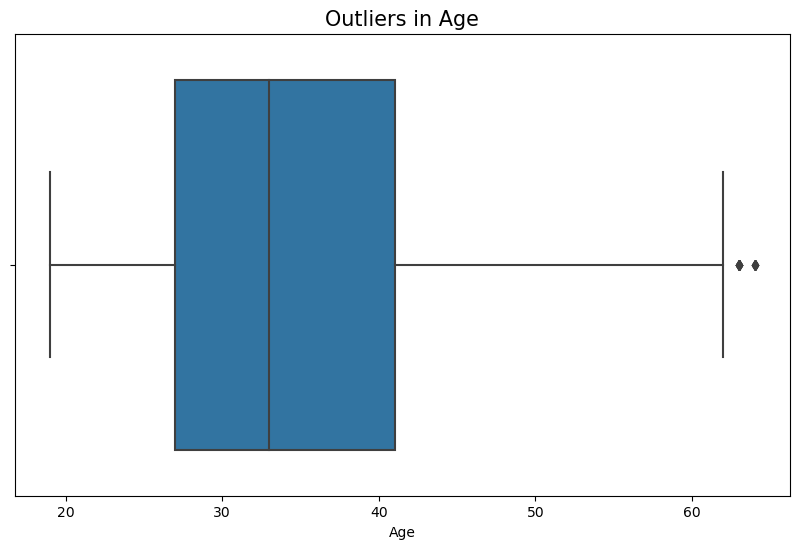


Outliers in Age:  1.3 %



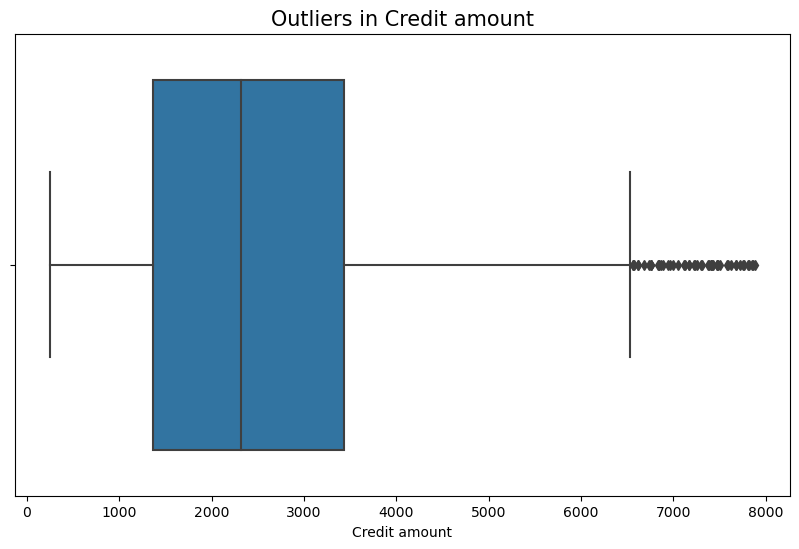


Outliers in Credit amount:  5.1 %



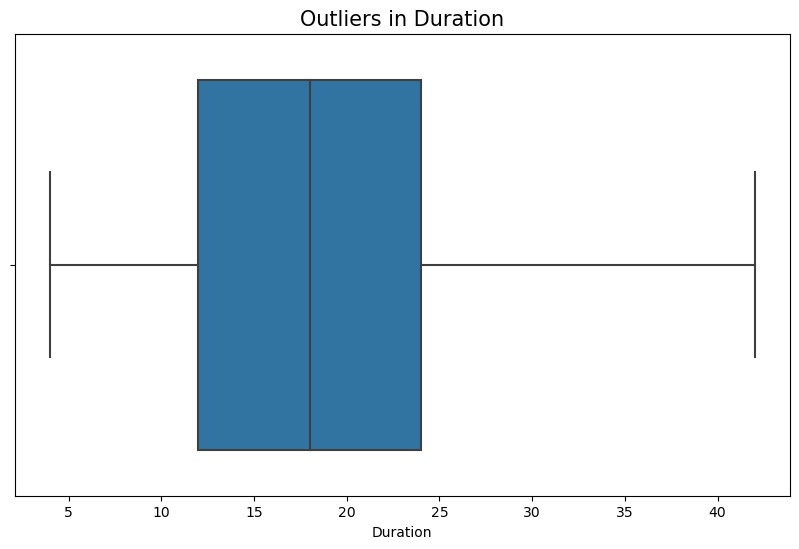


Outliers in Duration:  0.0 %



In [31]:
def outliers_chart(df,*var):
    for i in var:
        plt.figure(figsize=(10,6))
        plt.title(f'Outliers in {i}', fontsize=15)
        sns.boxplot(data= df, x=i)
        plt.show()
        print()
        q1,q3 = np.percentile(df[i],(25,75))
        IQR = q3 -q1
        up_ws = q3 + 1.5 * IQR
        lw_ws = q1 - 1.5 * IQR
        out_data = df[(df[i]<lw_ws) | (df[i]>up_ws)]
        print(f'Outliers in {i}: ', round(out_data.shape[0]/df.shape[0]*100,2),'%')
        print()

outliers_chart(df,'Age','Credit amount', 'Duration')

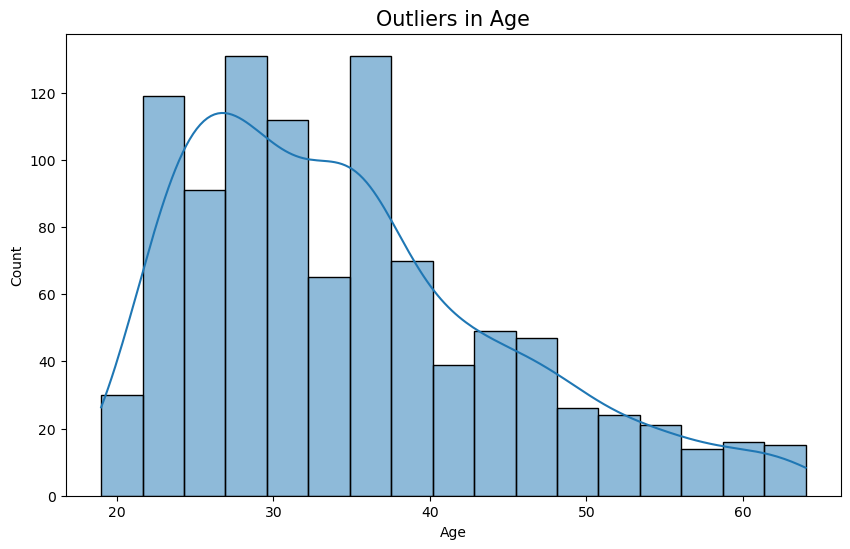

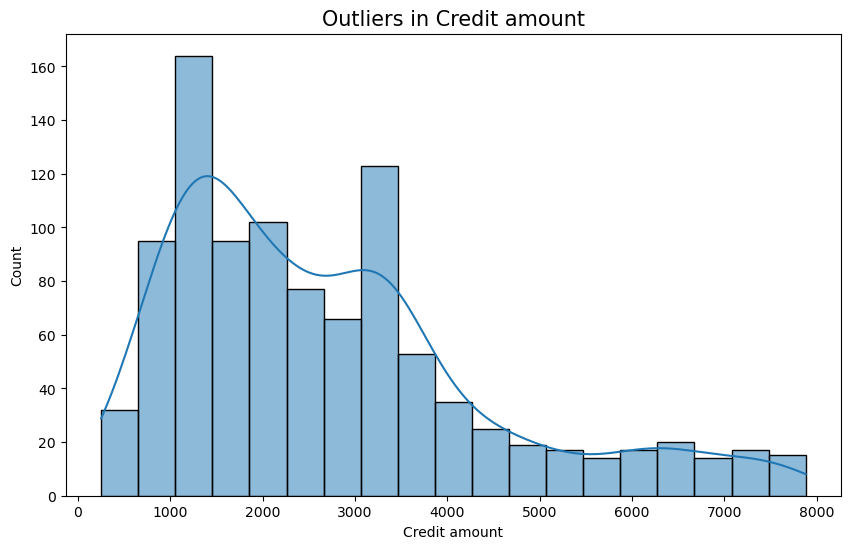

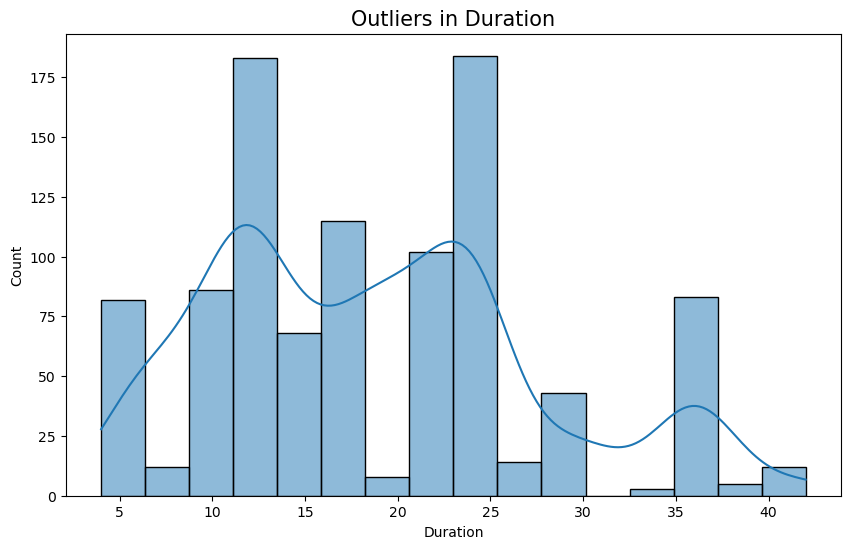

In [32]:
def displ(df, *var):
    for i in var:
        plt.figure(figsize=(10,6))
        plt.title(f'Outliers in {i}', fontsize=15)
        sns.histplot(data = df[i], kde = True)
        plt.show()
        print()
displ(df,'Age','Credit amount', 'Duration')

In [33]:
def logtran(df,*var):
    for i in var:
        df[i] = np.log(df[i])
logtran(df,'Age','Credit amount', 'Duration')

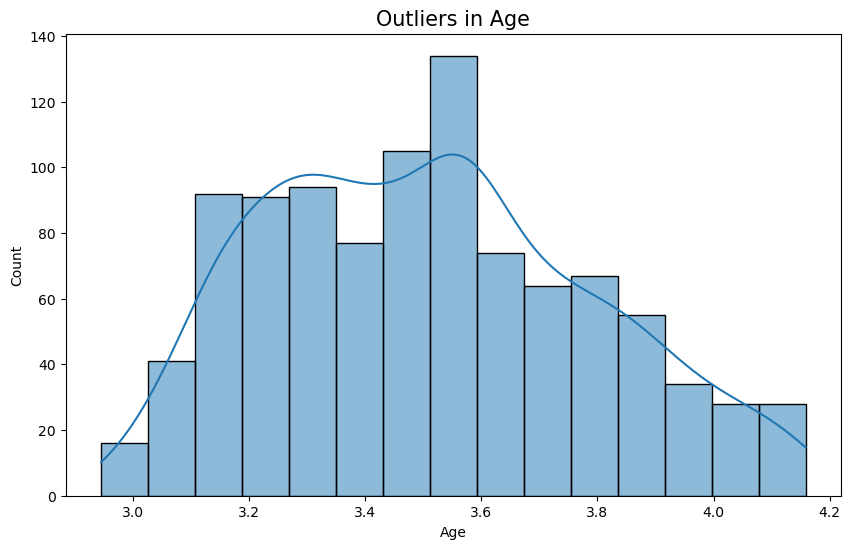

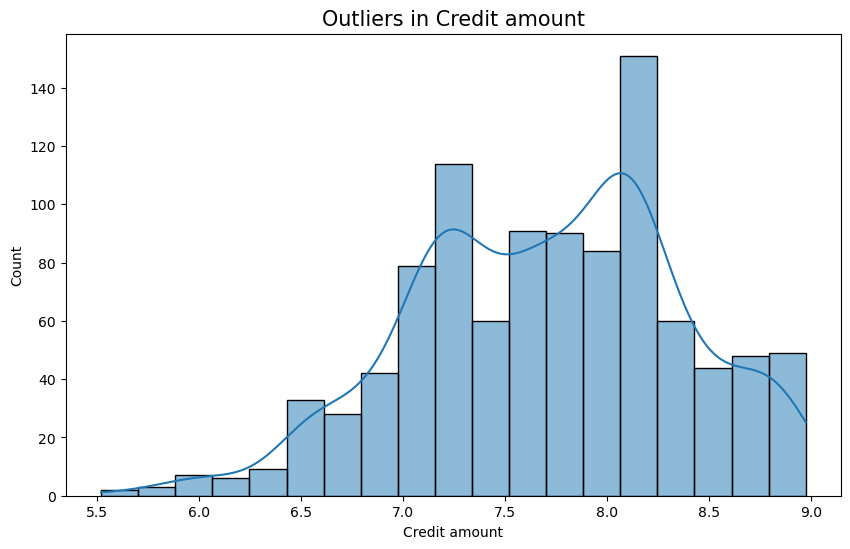

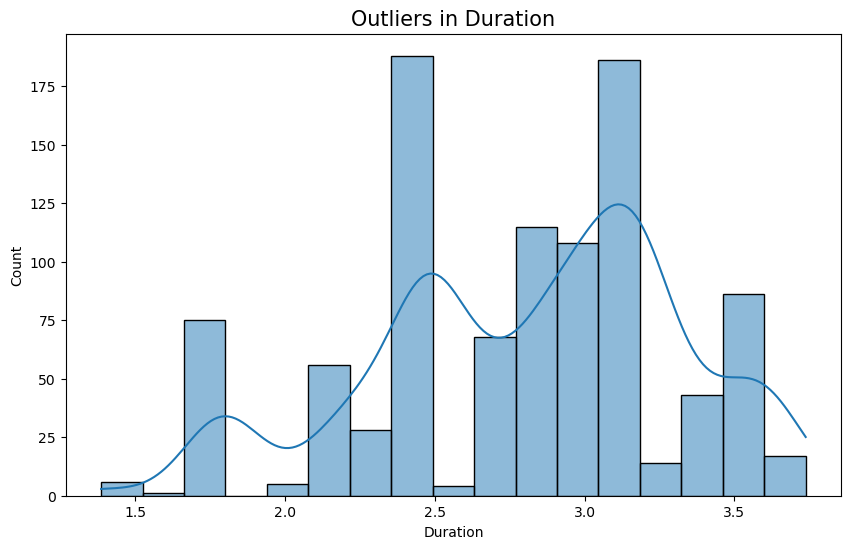

In [34]:
def displ(df, *var):
    for i in var:
        plt.figure(figsize=(10,6))
        plt.title(f'Outliers in {i}', fontsize=15)
        sns.histplot(data = df[i], kde = True)
        plt.show()
        print()
displ(df,'Age','Credit amount', 'Duration')

In [35]:
df.to_csv('data.csv')

### Distribution of Risk across Job Type and Gender

C:\Users\Sutuja\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


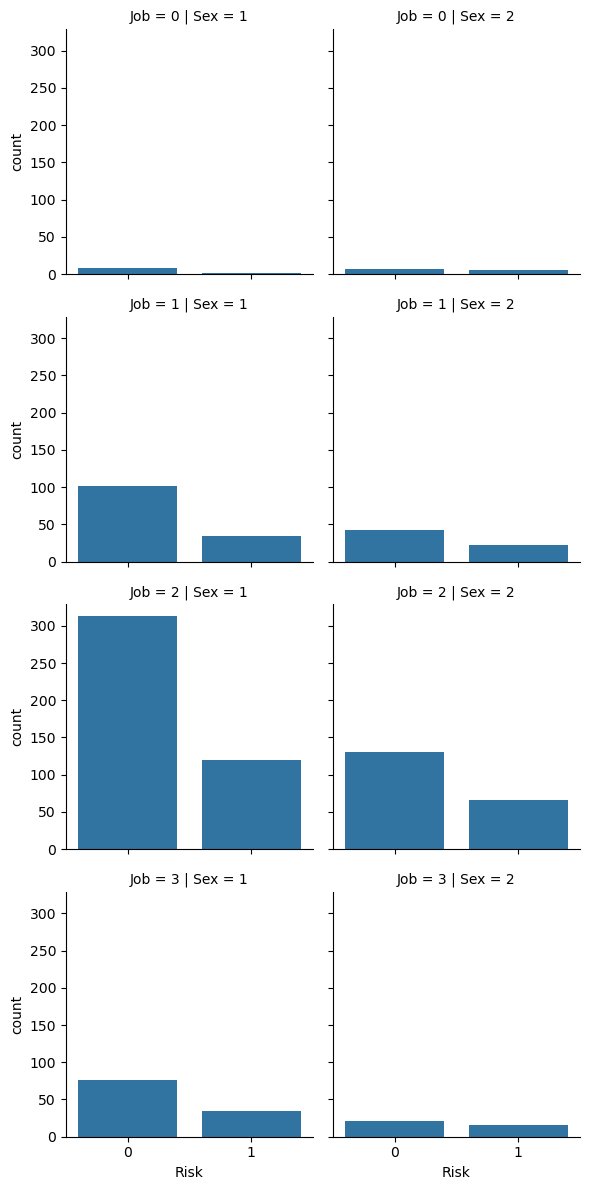

In [36]:
g = sns.FacetGrid(df, col="Sex",  row="Job")
g = g.map(sns.countplot, "Risk")

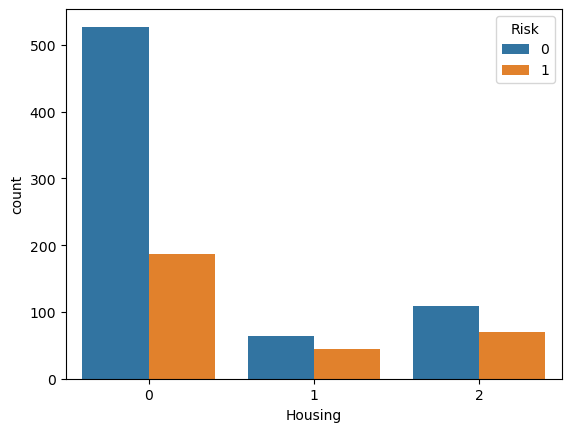

In [37]:
sns.countplot(x="Housing", hue="Risk", data=df)
plt.xlabel("Housing")
plt.show()

### People who own their own home are more likely to have a 'good' credit rating compared to people who rent.

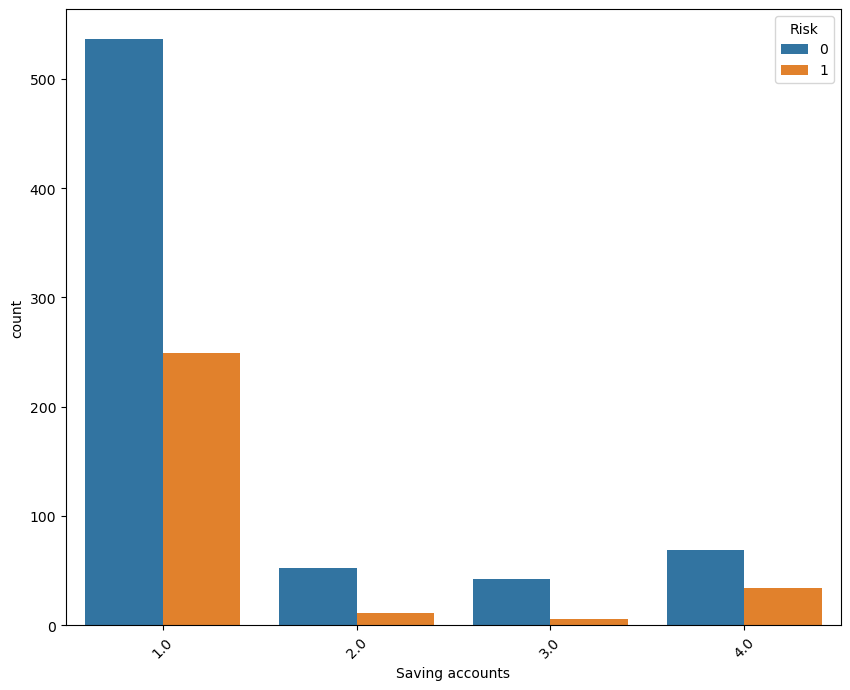

C:\Users\Sutuja\AppData\Local\Temp\ipykernel_10968\2865547302.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


In [38]:
fig, (ax1) = plt.subplots(1, figsize=(10,8))
sns.countplot(x="Saving accounts", hue="Risk", data=df, ax=ax1)
#plt.xticks(range(len(label_encoder.classes_)), label_encoder.classes_)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
plt.show()

fig.show()

Where :- [ 1.0- little, 2.0- Quit rich, 3.0- Rich, 4.0- Moderate] 
### - Saving accounts: The trend holds. The richer you are, the more likley you are to be classified as good. However, unlike checking accounts, where those with 'little' money have equal distribution of good and bad ratings, in savings accounts, there are visibly more good ratings than bad ones. This makes sense since the very existence of a savings account implies some degree of financial security.



## Examining how the data is related to each other.

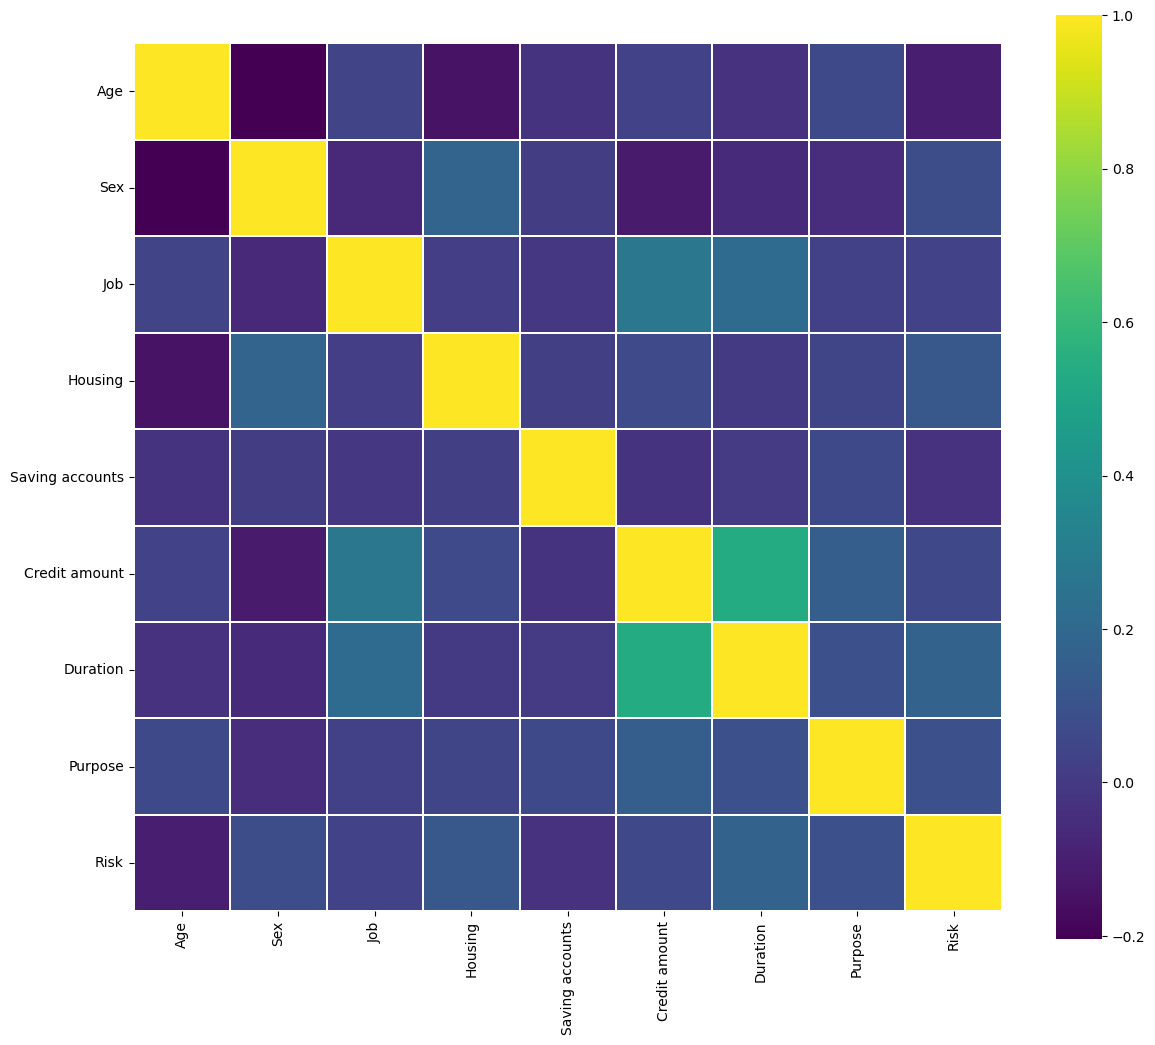

In [39]:
plt.figure(figsize=(14,12))
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', cmap='viridis')
plt.show()

# Splitting the dataset in to train and test

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
df['Risk'].value_counts()

0    700
1    300
Name: Risk, dtype: int64

In [42]:
X = df.drop(['Risk', 'Credit amount'], axis=1).values
y = df['Risk'].values

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [43]:
X_train

array([[4.14313473, 1.        , 2.        , ..., 1.        , 3.03989269,
        4.        ],
       [3.49650756, 1.        , 2.        , ..., 1.        , 3.04452244,
        1.        ],
       [3.91202301, 1.        , 2.        , ..., 2.        , 1.79175947,
        3.        ],
       ...,
       [3.29583687, 1.        , 2.        , ..., 3.        , 3.17805383,
        3.        ],
       [3.21887582, 1.        , 2.        , ..., 1.        , 2.48490665,
        0.        ],
       [3.17805383, 2.        , 2.        , ..., 1.        , 1.79175947,
        0.        ]])

In [44]:
X_test

array([[3.17805383, 2.        , 2.        , ..., 1.        , 2.89037176,
        0.        ],
       [3.55534806, 1.        , 1.        , ..., 4.        , 2.89037176,
        3.        ],
       [3.4657359 , 1.        , 2.        , ..., 4.        , 3.17805383,
        3.        ],
       ...,
       [3.04452244, 1.        , 1.        , ..., 1.        , 3.17805383,
        4.        ],
       [3.09104245, 2.        , 2.        , ..., 1.        , 3.17805383,
        3.        ],
       [3.66356165, 1.        , 1.        , ..., 1.        , 3.03989269,
        3.        ]])

In [45]:
y_train

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [46]:
y_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0], dtype=int64)

In [47]:
from sklearn.preprocessing import StandardScaler

# Standardize the features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building the Model

## Models used to predict :
1.LogisticRegression

2.KNeighborsClassifier

3.DecisionTreeClassifier

4.RandomForest Classifier

5.Support Vector Classification (SVC)

6.Naive Bayes

7.xgboost

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score
import xgboost as xgb

### Creating models

In [49]:
models=[0]*7

models[0] = LogisticRegression()
models[1] = KNeighborsClassifier()
models[2] = DecisionTreeClassifier()
models[3] = RandomForestClassifier()
models[4] = SVC()
models[5] = GaussianNB()
models[6] = xgb.XGBClassifier()

In [50]:
models

[LogisticRegression(),
 KNeighborsClassifier(),
 DecisionTreeClassifier(),
 RandomForestClassifier(),
 SVC(),
 GaussianNB(),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...)]

## Creating a function to check the accuracy score and f1 score for each model

In [51]:
def check():
    for m in models:
        model=m
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        print('Model Name: ',m)
        print("Accuracy score is: ",accuracy_score(y_test,y_pred)*100)
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        print()

In [52]:
check()

Model Name:  LogisticRegression()
Accuracy score is:  70.0
[[134   7]
 [ 53   6]]
              precision    recall  f1-score   support

           0       0.72      0.95      0.82       141
           1       0.46      0.10      0.17        59

    accuracy                           0.70       200
   macro avg       0.59      0.53      0.49       200
weighted avg       0.64      0.70      0.63       200


Model Name:  KNeighborsClassifier()
Accuracy score is:  65.5
[[116  25]
 [ 44  15]]
              precision    recall  f1-score   support

           0       0.72      0.82      0.77       141
           1       0.38      0.25      0.30        59

    accuracy                           0.66       200
   macro avg       0.55      0.54      0.54       200
weighted avg       0.62      0.66      0.63       200


Model Name:  DecisionTreeClassifier()
Accuracy score is:  60.0
[[104  37]
 [ 43  16]]
              precision    recall  f1-score   support

           0       0.71      0.74    

C:\Users\Sutuja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sutuja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sutuja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
for model in models:    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate accuracy on training and testing data
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    print("\n",model)
    print(accuracy_train)
    print(accuracy_test)


 LogisticRegression()
0.7075
0.7

 KNeighborsClassifier()
0.75125
0.655

 DecisionTreeClassifier()
0.98875
0.6

 RandomForestClassifier()
0.98875
0.64

 SVC()
0.69875
0.705

 GaussianNB()
0.6875
0.69

 XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
0.9675
0.655


## Checking that our model is overfitted or not, by fitting the test dataset and then predicting the train dataset

In [54]:
def tcheck():
    for m in models:
        model=m
        model.fit(X_test,y_test)
        y_pred = model.predict(X_train)
        print('Model Name: ',m)
        print("Accuracy score is: ",accuracy_score(y_train,y_pred)*100)
        print("F1 score is: ",f1_score(y_train,y_pred)*100)
        print()
tcheck()

Model Name:  LogisticRegression()
Accuracy score is:  68.375
F1 score is:  0.7843137254901961

Model Name:  KNeighborsClassifier()
Accuracy score is:  65.25
F1 score is:  22.346368715083802

Model Name:  DecisionTreeClassifier()
Accuracy score is:  61.0
F1 score is:  37.34939759036144

Model Name:  RandomForestClassifier()
Accuracy score is:  64.375
F1 score is:  26.735218508997427

Model Name:  SVC()
Accuracy score is:  69.875
F1 score is:  0.0

Model Name:  GaussianNB()
Accuracy score is:  67.875
F1 score is:  12.88135593220339

Model Name:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_thresh

In [55]:
from sklearn.model_selection import cross_val_score

for m in models:
    scores = cross_val_score(m, X_train, y_train, cv=10)*100
    print('Model Name: ',m)
    print('Cross-Validation Accuracy Scores', scores)
    print()

Model Name:  LogisticRegression()
Cross-Validation Accuracy Scores [67.5  71.25 71.25 71.25 63.75 70.   71.25 72.5  71.25 72.5 ]

Model Name:  KNeighborsClassifier()
Cross-Validation Accuracy Scores [72.5  62.5  67.5  63.75 61.25 57.5  62.5  72.5  62.5  60.  ]

Model Name:  DecisionTreeClassifier()
Cross-Validation Accuracy Scores [57.5  57.5  65.   61.25 58.75 68.75 53.75 60.   57.5  72.5 ]

Model Name:  RandomForestClassifier()
Cross-Validation Accuracy Scores [68.75 67.5  65.   65.   67.5  66.25 60.   67.5  67.5  68.75]

Model Name:  SVC()
Cross-Validation Accuracy Scores [68.75 70.   70.   70.   70.   70.   70.   70.   70.   70.  ]

Model Name:  GaussianNB()
Cross-Validation Accuracy Scores [67.5  68.75 73.75 65.   60.   71.25 68.75 65.   67.5  68.75]

Model Name:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable

## Hyper parameter tuning

#### logistic hyperparameter tuning

In [56]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create a logistic regression model
logreg_model = LogisticRegression()

# Create GridSearchCV with cross-validation
grid_search = GridSearchCV(logreg_model, param_grid, cv=5, scoring='accuracy')

# Train the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model with tuned hyperparameters
best_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the best model's accuracy
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Best Model Accuracy:", accuracy_best)

C:\Users\Sutuja\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Sutuja\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Sutuja\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Sutuja\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Sutuja\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Sutuja\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max

Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Model Accuracy: 0.7


#### Random forest  Classifier hyperparameter tuning

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, precision_score, recall_score

In [58]:
#Hyper parametertuning random forest
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best parameters:", best_params)
print("Best score:", best_model)

# Train the final model with the best parameters
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)
#rf_best = RandomForestClassifier(**best_params)
#rf_best.fit(X_train, y_train)

# Evaluate the best model on the test set
#test_accuracy = rf_best.score(X_test, y_test)
#print("Test accuracy:", test_accuracy)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

C:\Users\Sutuja\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Best score: RandomForestClassifier(max_features='auto', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=300, random_state=42)
Test accuracy: 0.675
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.89      0.79       141
           1       0.38      0.15      0.22        59

    accuracy                           0.68       200
   macro avg       0.55      0.52      0.51       200
weighted avg       0.62      0.68      0.62       200

Precision: 0.6153409090909091
Recall: 0.675


In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a KNN classifier
knn = KNeighborsClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Values of k to try
    'weights': ['uniform', 'distance'],  # Weighting schemes
    'p': [1, 2],  # Distance metric (1 for Manhattan, 2 for Euclidean)
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train a KNN classifier with the best hyperparameters
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_knn.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Best Hyperparameters: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Accuracy: 0.68


#### Decision Tree Classifier hyperparameter tuning

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],  # Splitting criterion
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the tree
}   

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=tree_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train a DecisionTreeClassifier with the best hyperparameters
best_tree_classifier = DecisionTreeClassifier(random_state=42, **best_params)
best_tree_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_tree_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10}
Accuracy: 0.61


#### SVC hyperparameter tuning

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an SVC classifier
svc_classifier = SVC()

# Define the hyperparameter grid to search
param_grid = {
    'C': [0.1, 1, 10],            # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto']    # Kernel coefficient (scale or auto)
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=svc_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train an SVC classifier with the best hyperparameters
best_svc_classifier = SVC(**best_params)
best_svc_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_svc_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Best Hyperparameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.705


#### Naive Bayes hyperparameter tuning

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Create a GaussianNB classifier
gnb_classifier = GaussianNB()

# Define the hyperparameter grid to search
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)  # Values for var_smoothing
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=gnb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train a GaussianNB classifier with the best hyperparameters
best_gnb_classifier = GaussianNB(var_smoothing=best_params['var_smoothing'])
best_gnb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_gnb_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Best Hyperparameters: {'var_smoothing': 0.12328467394420659}
Accuracy: 0.7


In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],      # Number of boosting rounds (trees)
    'max_depth': [3, 4, 5],              # Maximum tree depth
    'learning_rate': [0.01, 0.1, 0.2],   # Step size shrinkage for boosting
    'subsample': [0.7, 0.8, 0.9],        # Fraction of samples used for training each tree
    'colsample_bytree': [0.7, 0.8, 0.9], # Fraction of features used for training each tree
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train an XGBoost classifier with the best hyperparameters
best_xgb_classifier = xgb.XGBClassifier(random_state=42, **best_params)
best_xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_xgb_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Best Hyperparameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.705


Xgboost and SVC gives the best 

C:\Users\Sutuja\AppData\Local\Temp\ipykernel_10968\458789190.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'models': key,
C:\Users\Sutuja\AppData\Local\Temp\ipykernel_10968\458789190.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'models': key,
C:\Users\Sutuja\AppData\Local\Temp\ipykernel_10968\458789190.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'models': key,
C:\Users\Sutuja\AppData\Local\Temp\ipykernel_10968\458789190.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table

                                     fpr                              tpr  \
models                                                                      
LR       [0.0, 0.10638297872340426, 1.0]  [0.0, 0.15254237288135594, 1.0]   
SVC                           [0.0, 1.0]                       [0.0, 1.0]   
NB      [0.0, 0.014184397163120567, 1.0]  [0.0, 0.01694915254237288, 1.0]   
XGB      [0.0, 0.04964539007092199, 1.0]  [0.0, 0.11864406779661017, 1.0]   

             auc  
models            
LR      0.523080  
SVC     0.500000  
NB      0.501382  
XGB     0.534499  


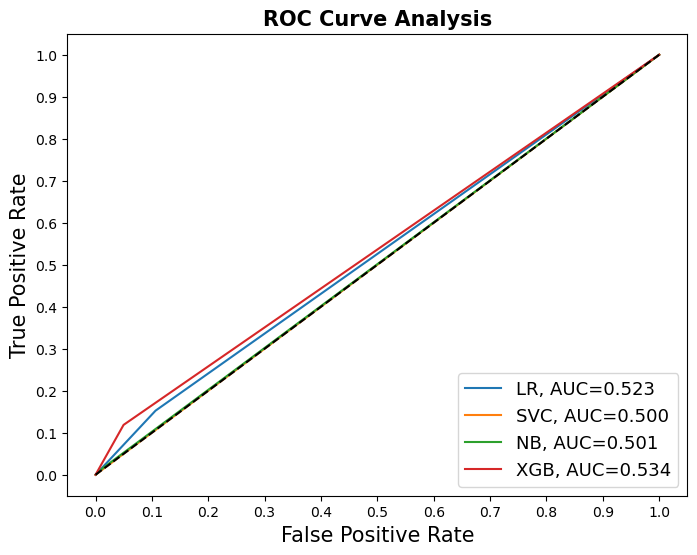

In [67]:
from sklearn.metrics import roc_curve, roc_auc_score

results_table = pd.DataFrame(columns = ['models', 'fpr','tpr','auc'])

predictions = {'LR':best_model.predict(X_test) , 'SVC': best_svc_classifier.predict(X_test), 'NB': best_gnb_classifier.predict(X_test), 'XGB': best_xgb_classifier.predict(X_test)}

for key in predictions:
    fpr, tpr, _ = roc_curve(y_test, predictions[key])
    auc = roc_auc_score(y_test, predictions[key])
    
    results_table = results_table.append({'models': key,
                                         'fpr' : fpr,
                                         'tpr' : tpr,
                                         'auc' : auc}, ignore_index=True)
    
results_table.set_index('models', inplace=True)

print(results_table)

fig = plt.figure(figsize = (8,6))

for i in results_table.index:
    plt.plot(results_table.loc[i]['fpr'], 
             results_table.loc[i]['tpr'], 
             label = "{}, AUC={:.3f}".format(i, results_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color = 'black', linestyle = '--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop = {'size':13}, loc = 'lower right')

plt.show()

In [68]:
import pickle

file = open('cridit_risk', 'wb')
pickle.dump(df, file)
file.close()